# Handwritten Digit Classification using Neural Networks

This project implements a multiclass neural network to classify digit images using TensorFlow.

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
import matplotlib.pyplot as plt

plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from autils import *
np.set_printoptions(precision=2)

#upload dataset

In [62]:
x=np.load("X.npy")
y=np.load("y.npy")

**check dimensions**

In [63]:
print ('The shape of X is: ' + str(x.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


**visualization**

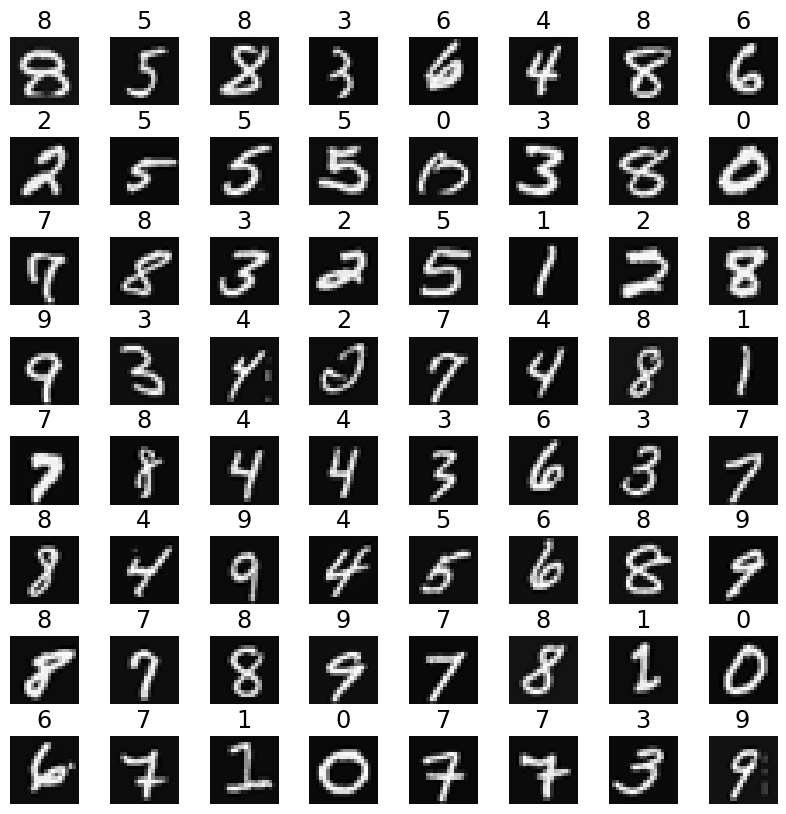

In [64]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

## Model Architecture
The neural network consists of two ReLU hidden layers followed by a linear output layer.

Softmax is applied inside the loss function for numerical stability.


In [65]:
tf.random.set_seed(1234)
model= Sequential([
    tf.keras.layers.InputLayer((400,)),
    tf.keras.layers.Dense(25, activation='relu', name='layer1'),
    tf.keras.layers.Dense(15, activation='relu', name='layer2'),
    tf.keras.layers.Dense(10, activation='linear', name='layer3')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)

In [66]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

#training

In [67]:
history = model.fit(
    x,y,
    epochs=40)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8839
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6637
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4305
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3494
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3048
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2748
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2515
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2313
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2144
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2003
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1882
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1775
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1681
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1595
Epoch 15/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

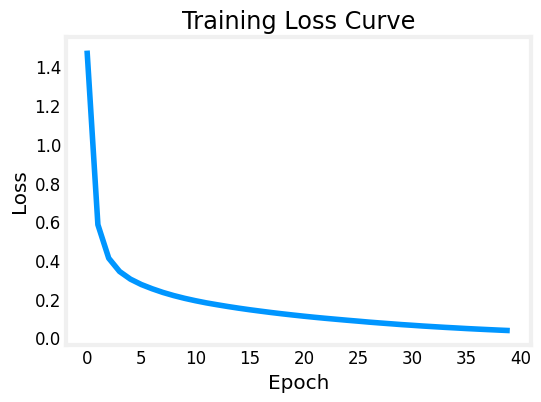

In [68]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


#prediction

In [72]:
# Select a sample image
index = 1015
image = x[index]
true_label = y[index,0]

# Model prediction --> logits
logits = model.predict(image.reshape(1,400), verbose=0)

# Convert logits to probabilities
probabilities = tf.nn.softmax(logits).numpy()

# Predicted class
predicted_label = np.argmax(probabilities)

print("True label:", true_label)
print("Predicted label:", predicted_label)

print("\nProbability distribution:")
for i, p in enumerate(probabilities[0]):
    print(f"Digit {i}: {p:.4f}")

print("\nSum of probabilities:", np.sum(probabilities))


True label: 2
Predicted label: 2

Probability distribution:
Digit 0: 0.0000
Digit 1: 0.0168
Digit 2: 0.9557
Digit 3: 0.0156
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0119
Digit 8: 0.0000
Digit 9: 0.0000

Sum of probabilities: 1.0000001


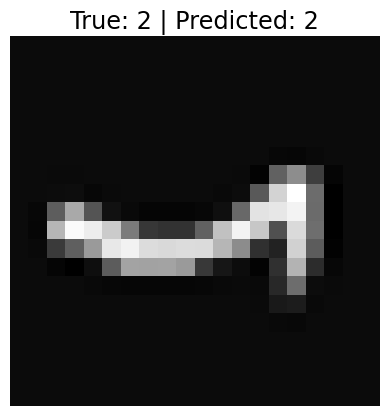

In [74]:
plt.imshow(image.reshape(20,20), cmap='gray')
plt.title(f"True: {true_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()


**accuracy**

In [73]:
preds = model.predict(x, verbose=0)
preds_classes = np.argmax(tf.nn.softmax(preds), axis=1)

accuracy = np.mean(preds_classes == y.flatten())
print("Accuracy:", accuracy)


Accuracy: 0.9956
